In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import scipy.fftpack     as spfft # For an illustration of the frequency
import scipy.optimize    as scopt # For minimizing objective functions with constraints
import cvxpy             as cvx   # Library for convex optimization
import pywt                       # Wavelet transform software 
import sigpy             as sp    # For the CS part

from IPython     import display  
from __future__  import division

plt.rcParams['figure.figsize'] = (7, 7)

%matplotlib inline

#### Minimization in the sparsifying domain:
$$
\widehat{z} = \text{arg}\,\min_{z\in C} \frac{1}{2} \|y - \Omega F z \|_2^2 + \lambda \|z\|_1
$$


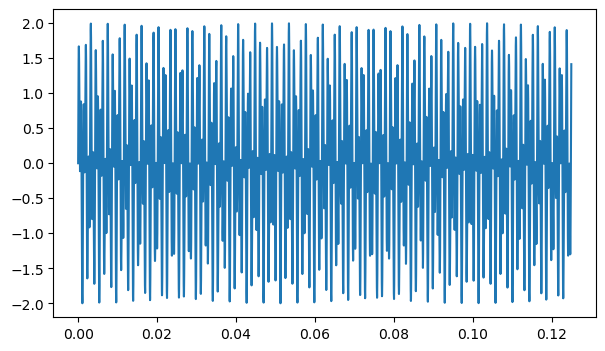

In [2]:
# Generate "A" tone
n = 5000
t = np.linspace(0, 1/8, n)
y  = np.sin(1394 * np.pi * t) + np.sin(3266 * np.pi * t)
yt = spfft.dct(y, norm='ortho')

plt.figure( figsize = (7,4))
plt.plot(t, y)
plt.show()

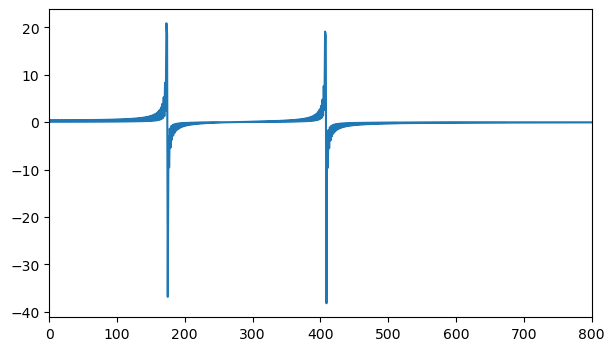

In [3]:
# Compute DFT (cosines) full signal
plt.figure( figsize = (7,4))
plt.plot(yt)
plt.xlim(0,800)
plt.show()

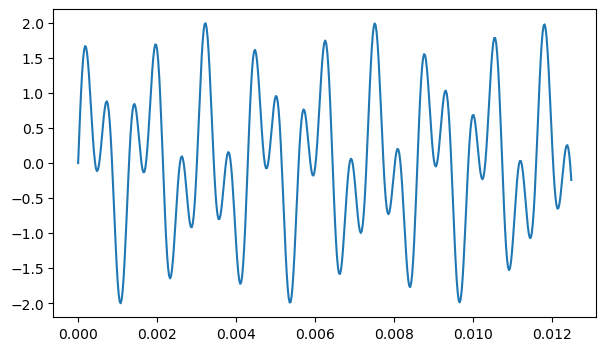

In [4]:
# Plot the first 500 samples

plt.figure( figsize = (7,4))
plt.plot(t[:500], y[:500])
plt.show()

In [5]:
# From these 5000 data, we randomly choose 500 out of them.

m  = 500 # Take less than 10% samples
ri = np.random.choice(n, m, replace=False) # random sample of indices
ri.sort()                                  # sorting not strictly necessary, but convenient for plotting

# These are your mesurement locations
t2 = t[ri]
y2 = y[ri]

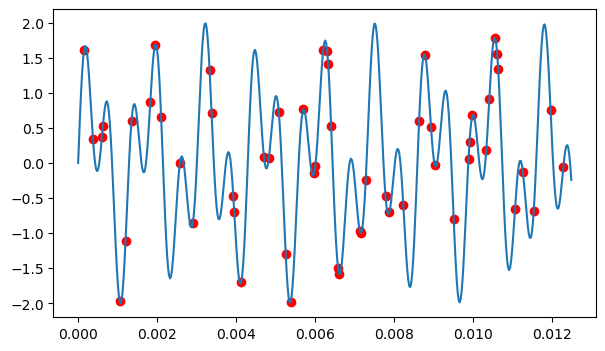

In [6]:
# Locate those random points

plt.figure( figsize = (7,4))
plt.plot(t[:500], y[:500]) # true data for first 500 points
plt.scatter(t[ri[ri<500]], y[ri[ri<500]],c='r') # sampled data.
plt.show()

In [7]:
# A = Psi*C is sensing matrix.

psi2 = spfft.idct(np.identity(n), norm='ortho', axis=0)
A2   = psi2[ri] # psi*C

# Do L2 optimization
vx          = cvx.Variable(n)
objective   = cvx.Minimize(cvx.norm(vx, 2))
constraints = [A2@vx == y2] # chech @ vsus * versus multiply()
prob        = cvx.Problem(objective, constraints)
result      = prob.solve(verbose=True)

                                     CVXPY                                     
                                     v1.4.3                                    
(CVXPY) May 10 03:55:39 PM: Your problem has 5000 variables, 1 constraints, and 0 parameters.
(CVXPY) May 10 03:55:39 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 10 03:55:39 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 10 03:55:39 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 10 03:55:39 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 10 03:55:39 PM: Compiling problem (target solver=ECOS).
(C

/opt/anaconda3/envs/IA_practical/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


(CVXPY) May 10 03:55:39 PM: Applying reduction ECOS
(CVXPY) May 10 03:55:40 PM: Finished problem compilation (took 4.126e-01 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 10 03:55:40 PM: Invoking solver ECOS  to obtain a solution.
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) May 10 03:55:49 PM: Problem status: optimal
(CVXPY) May 10 03:55:49 PM: Optimal value: 2.241e+01
(CVXPY) May 10 03:55:49 PM: Compilation took 4.126e-01 seconds
(CVXPY) May 10 03:55:49 PM: Solver (including time spent in interface) took 9.655e+00 seconds


In [8]:
x   = np.array(vx.value)
x   = np.squeeze(x)
sig = spfft.idct(x, norm='ortho', axis=0)

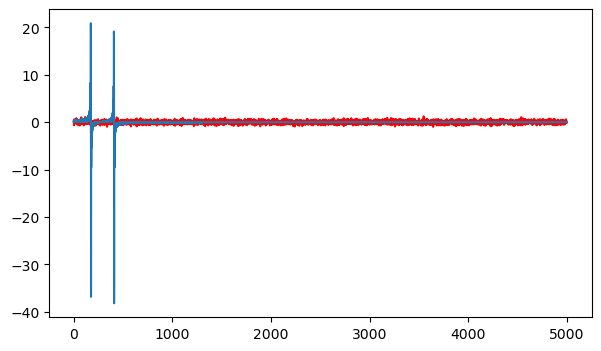

In [9]:
plt.figure( figsize = (7,4))
plt.plot(x,'',c='r') 
plt.plot(yt)
plt.show()

In [10]:
rec = spfft.dct(x, norm='ortho', axis=0)

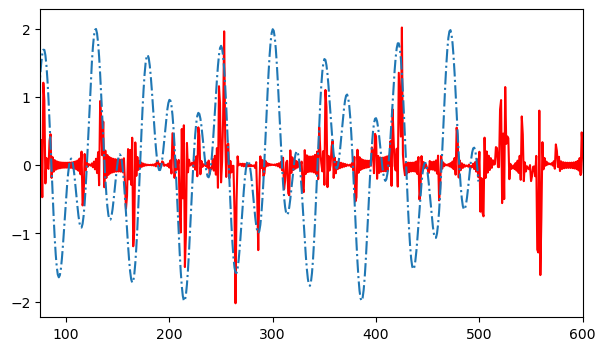

In [11]:
plt.figure( figsize = (7,4))
plt.plot(rec,'',c='r') 
plt.plot(y[:500],'-.')
plt.xlim(75,600)
plt.show()

In [12]:
# A = Psi*C

psi1 = spfft.idct(np.identity(n), norm='ortho', axis=0)
A1   = psi1[ri] # psi*C

# Do L1 optimization
vx1         = cvx.Variable(n)
objective   = cvx.Minimize(cvx.norm(vx1 , 1))
constraints = [A1@vx1 == y2] # chech @ vsus * versus multiply()
prob        = cvx.Problem(objective, constraints)
result      = prob.solve(verbose=True)

                                     CVXPY                                     
                                     v1.4.3                                    
(CVXPY) May 10 03:56:28 PM: Your problem has 5000 variables, 1 constraints, and 0 parameters.
(CVXPY) May 10 03:56:28 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 10 03:56:28 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 10 03:56:28 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 10 03:56:28 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 10 03:56:28 PM: Compiling problem (target solver=ECOS).
(C

In [13]:
x1   = np.array(vx1.value)
x1   = np.squeeze(x1)
sig = spfft.idct(x1, norm='ortho', axis=0)

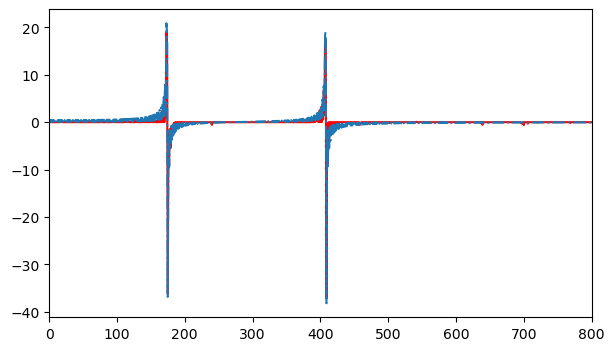

In [14]:
plt.figure( figsize = (7,4))
plt.plot(x1,'',c='r') 
plt.plot(yt,'-.')
plt.xlim(0,800)
plt.show()

In [15]:
rec1 = spfft.dct(x1, norm='ortho', axis=0)

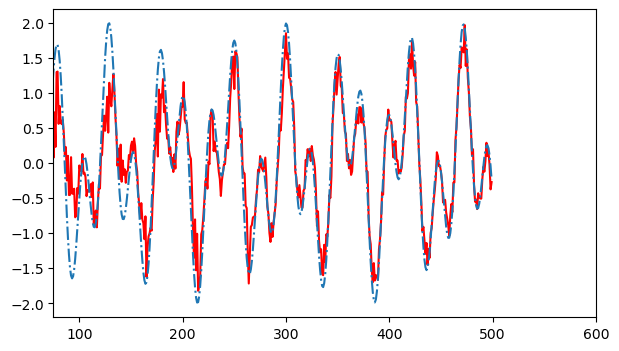

In [16]:
plt.figure( figsize = (7,4))
plt.plot(rec1[:500],'',c='r') 
plt.plot(y[:500],'-.')
plt.xlim(75,600)
plt.show()